# Importing the dataset

In [1]:
#This step imports the dataset
import pandas as pd
file = "C:/Users/seerl/Downloads/legal_text_classification.csv"
df = pd.read_csv(file)
df['case_text'] = df['case_text'].str.lower()
df.head(20)

,case_id,case_outcome,case_title,case_text
0,Case1,cited,Alpine Hardwood (Aust) Pty Ltd v Hardys Pty Lt...,ordinarily that discretion will be exercised s...
1,Case2,cited,Black v Lipovac [1998] FCA 699 ; (1998) 217 AL...,the general principles governing the exercise ...
2,Case3,cited,Colgate Palmolive Co v Cussons Pty Ltd (1993) ...,ordinarily that discretion will be exercised s...
3,Case4,cited,Dais Studio Pty Ltd v Bullett Creative Pty Ltd...,the general principles governing the exercise ...
4,Case5,cited,Dr Martens Australia Pty Ltd v Figgins Holding...,the preceding general principles inform the ex...
5,Case6,cited,GEC Marconi Systems Pty Ltd v BHP Information ...,i accept that the making of a rolled up offer ...
6,Case7,cited,John S Hayes &amp; Associates Pty Ltd v Kimber...,the preceding general principles inform the ex...
7,Case8,cited,Seven Network Limited v News Limited (2007) 24...,on the question of the level of unreasonablene...
8,Case9,applied,Australian Broadcasting Corporation v O'Neill ...,recent decision of the high court in australia...
9,Case10,followed,Hexal Australia Pty Ltd v Roche Therapeutics I...,hexal australia pty ltd v roche therapeutics i...


# Downloading stop words

In [2]:
#This step downloads the stop words
import nltk 
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)

{'were', 'once', 'into', 'does', 'ourselves', 'don', 'up', 'more', 'be', 'shouldn', 'just', "couldn't", 'a', 'nor', 'so', "don't", 'your', 'these', 'having', 'been', 'own', 'yours', 'himself', 'wasn', 'other', 'from', 'needn', 'yourselves', 'against', 'all', 'or', 'not', 'some', 't', 'yourself', 'because', 'any', 'at', "wasn't", "you're", 'me', 'didn', 'her', 'couldn', 'my', 'with', 'hadn', 'the', 'them', 'for', 'and', 'herself', 'should', 'through', 'being', 'its', 'll', 'he', "shan't", 'she', 'most', 'why', 'that', 'how', 'his', 'who', 'you', 'aren', 'below', 're', 'have', 'until', 'they', "isn't", 'no', 'am', "doesn't", 'in', 'such', 'which', 'was', 'same', "didn't", 'when', 'here', "won't", 'it', 'had', "you've", 'ma', "hasn't", "hadn't", "it's", 'very', "mightn't", "you'd", 'off', 'will', 'about', 'doesn', 'this', 'above', "haven't", "weren't", 'down', 'after', 'weren', 'we', 'y', 'haven', 'as', "should've", 'then', 'further', 'm', 'out', 'wouldn', 'on', 'an', 'our', 'd', 'ours', 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seerl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Creating a pipeline

In [3]:
#This step creates a pipeline and remove_stop is a user defined function which removes all the stop words
import regex as re

def tokenize(case_text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', case_text)
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in stopwords]

pipeline = [str, tokenize, remove_stop]

def prepare(case_text, pipeline):
    tokens = case_text
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens

# Running a pipeline

In [4]:
#This step runs the pipeline
df['tokens'] = df['case_text'].apply(prepare, pipeline=pipeline)

# Counting the tokens

In [5]:
#This step is used for counting the tokens
from collections import Counter
counter = Counter()
df['tokens'].map(counter.update)
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df = freq_df.query('freq >= 1')
freq_df.index.name = 'token'
freq_df = freq_df.sort_values('freq', ascending=False)
freq_df.head(20)


,freq
token,
v,90111
court,56243
ltd,47169
j,43851
act,33547
pty,32270
case,28670
would,27737
tribunal,27274


# Drawing the wordcloud

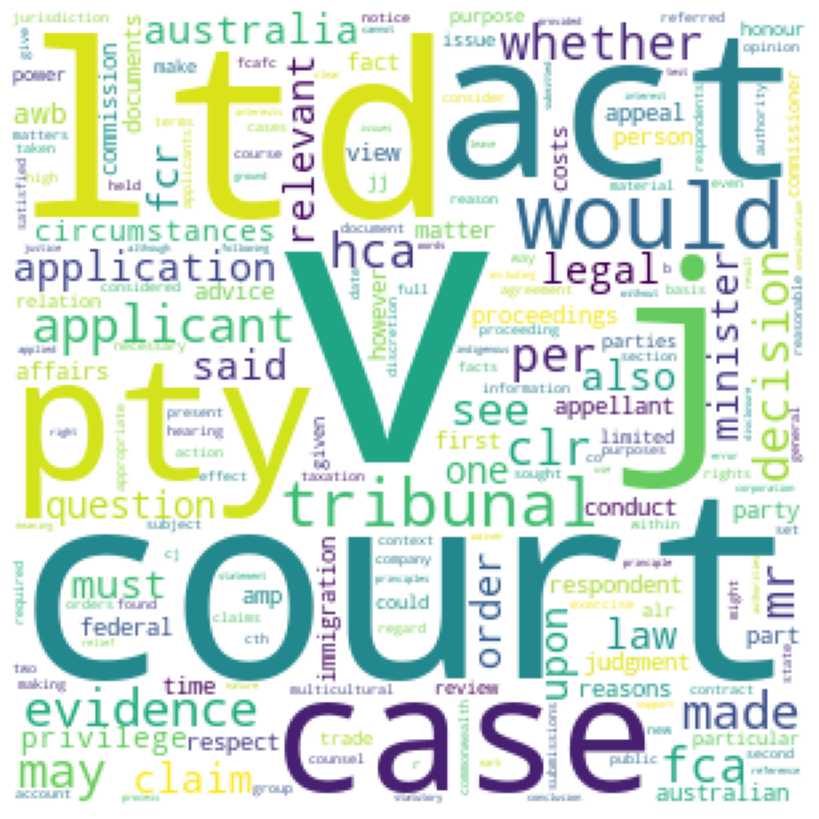

In [6]:
#This step is used to draw the Word cloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['freq'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Creating TFIDF

In [7]:
#This step is used for creating a TFIDF
import numpy as np
def compute_idf(df, column='tokens', preprocess=None, min_df=1):
    def update(doc):
        tokens = doc if preprocess is None else preprocess(doc)
        counter.update(set(tokens))
    # count tokens
    counter = Counter()
    df[column].map(update)
    # create data frame and compute idf
    idf_df = pd.DataFrame.from_dict(counter, orient='index', columns=['df'])
    idf_df = idf_df.query('df >= @min_df')
    idf_df['idf'] = np.log(len(df)/idf_df['df'])+0.1
    idf_df.index.name = 'tokens'
    return idf_df
idf_df = compute_idf(df)

In [8]:
freq_df['tfidf'] = freq_df['freq'] * idf_df['idf']
freq_df.head()

,freq,tfidf
token,,
v,90111,12388.062781
court,56243,35844.935643
ltd,47169,33322.195784
j,43851,30155.570038
act,33547,33058.970614


# Creating Word cloud for TFIDF

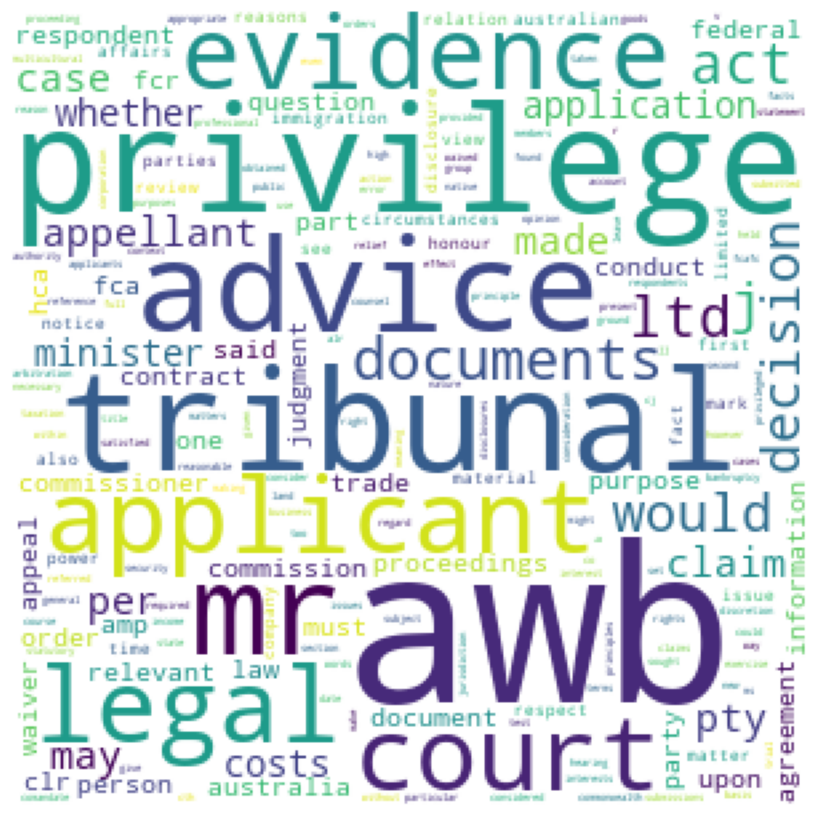

In [9]:
#This step is used to create the word cloud for the TFIDF
wc = WordCloud(background_color='white', width = 300, height=300, margin=2)
wc.fit_words(freq_df['tfidf'].to_dict() )
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Function to count keywords for heatmaps

In [10]:
#This step is used to count keywords for generating heatmaps
df['num_tokens'] = df['tokens'].map(len)

def count_keywords(tokens, keywords): 
    tokens = [t for t in tokens if t in keywords]
    counter = Counter(tokens)
    return [counter.get(k, 0) for k in keywords]

# Grouping Data 

In [11]:
#This function is used to group the data by case_id
def count_keywords_by(df, by, keywords, column='tokens'):
    
    df = df.reset_index(drop=True) # if the supplied dataframe has gaps in the index
    freq_matrix = df[column].apply(count_keywords, keywords=keywords)
    freq_df = pd.DataFrame.from_records(freq_matrix, columns=keywords)
    freq_df[by] = df[by] # copy the grouping column(s)
    
    return freq_df.groupby(by=by).sum().sort_values(by)

# Plotting the Seaborn plot

In [12]:
#This step is used to plot the seaborn plot for the heatmaps
import seaborn as sns
keywords = ['court', 'act', 'case', 'applicant',
            'tribunal', 'would', 'pty', 'j', 'ltd', 
            'evidence', 'decision', 'whether','may', 'made']  
freq_df = count_keywords_by(df, by='case_id', keywords=keywords)

In [13]:
# compute relative frequencies based on total number of tokens per year
freq_df = freq_df.div(df.groupby('case_id')['num_tokens'].sum(), axis=0)

In [14]:
# apply square root as sublinear filter for better contrast
freq_df = freq_df.apply(np.sqrt)

In [15]:
plt.figure(figsize=(15, 7)) 

<Figure size 1500x700 with 0 Axes>

<Figure size 1500x700 with 0 Axes>

# Heatmap plot

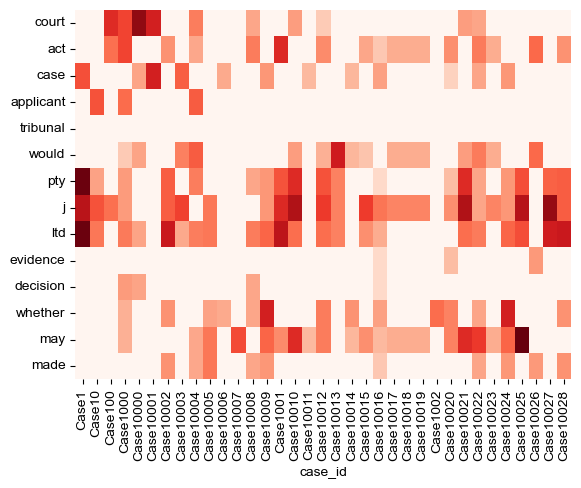

In [16]:
sns.heatmap(data=freq_df.iloc[:35].T, xticklabels=True, yticklabels=True, cbar=False, cmap="Reds")
sns.set(font_scale=1)